In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess.
from keras.preprocessing.image import ImageDataGenerator

# dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

import fnmatch

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Z=[]

# # resize gambar agar menjadi lebih kecil
# IMG_SIZE=128

# # menyimpan lokasi batik kedalam variabel

# batik_bali_DIR='/content/drive/MyDrive/dataset_batik/batik-bali'
# batik_betawi_DIR='/content/drive/MyDrive/dataset_batik/batik-betawi'
# batik_celup_DIR='/content/drive/MyDrive/dataset_batik/batik-celup'
# batik_cendrawasih_DIR='/content/drive/MyDrive/dataset_batik/batik-cendrawasih'
# batik_ceplok_DIR='/content/drive/MyDrive/dataset_batik/batik-ceplok'
# batik_ciamis_DIR='/content/drive/MyDrive/dataset_batik/batik-ciamis'
# batik_garutan_DIR='/content/drive/MyDrive/dataset_batik/batik-garutan'
# batik_gentongan_DIR='/content/drive/MyDrive/dataset_batik/batik-gentongan'
# batik_kawung_DIR='/content/drive/MyDrive/dataset_batik/batik-kawung'
# batik_keraton_DIR='/content/drive/MyDrive/dataset_batik/batik-keraton'
# batik_lasem_DIR='/content/drive/MyDrive/dataset_batik/batik-lasem'
# batik_megamendung_DIR='/content/drive/MyDrive/dataset_batik/batik-megamendung'
# batik_parang_DIR='/content/drive/MyDrive/dataset_batik/batik-parang'
# batik_pekalongan_DIR='/content/drive/MyDrive/dataset_batik/batik-pekalongan'
# batik_priangan_DIR='/content/drive/MyDrive/dataset_batik/batik-priangan'
# batik_sekar_DIR='/content/drive/MyDrive/dataset_batik/batik-sekar'
# batik_sidoluhur_DIR='/content/drive/MyDrive/dataset_batik/batik-sidoluhur'
# batik_sidomukti_DIR='/content/drive/MyDrive/dataset_batik/batik-sidomukti'
# batik_sogan_DIR='/content/drive/MyDrive/dataset_batik/batik-sogan'
# batik_tambal_DIR='/content/drive/MyDrive/dataset_batik/batik-tambal'

In [ ]:
Z=[]

# resize gambar agar menjadi lebih kecil
IMG_SIZE=150

# menyimpan lokasi batik kedalam variabel
batik_bali_DIR='/content/drive/MyDrive/batik_dataset/batik-bali'
batik_keraton_DIR='/content/drive/MyDrive/batik_dataset/batik-keraton'
batik_pekalongan_DIR='/content/drive/MyDrive/batik_dataset/batik-pekalongan'
batik_lasem_DIR='/content/drive/MyDrive/batik_dataset/batik-lasem'
batik_priangan_DIR='/content/drive/MyDrive/batik_dataset/batik-priangan'

In [ ]:
def assign_label(img,batik_type):
    return batik_type

In [ ]:
X=[]

def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))

In [ ]:
make_train_data('batik_bali',batik_bali_DIR)
# make_train_data('batik_betawi',batik_betawi_DIR)
# make_train_data('batik_celup',batik_celup_DIR)
# make_train_data('batik_cendrawasih',batik_cendrawasih_DIR)
# make_train_data('batik_ceplok',batik_ceplok_DIR)
# make_train_data('batik_ciamis',batik_ciamis_DIR)
# make_train_data('batik_garutan',batik_garutan_DIR)
# make_train_data('batik_gentongan',batik_gentongan_DIR)
# make_train_data('batik_kawung',batik_kawung_DIR)
make_train_data('batik_keraton',batik_keraton_DIR)
make_train_data('batik_lasem',batik_lasem_DIR)
# make_train_data('batik_megamendung',batik_megamendung_DIR)
# make_train_data('batik_parang',batik_parang_DIR)
make_train_data('batik_pekalongan',batik_pekalongan_DIR)
make_train_data('batik_priangan',batik_priangan_DIR)
# make_train_data('batik_sekar',batik_sekar_DIR)
# make_train_data('batik_sidoluhur',batik_sidoluhur_DIR)
# make_train_data('batik_sidomukti',batik_sidomukti_DIR)
# make_train_data('batik_sogan',batik_sogan_DIR)
# make_train_data('batik_tambal',batik_tambal_DIR)
# print(len(X))
# print(len(X))

100%|██████████| 50/50 [00:15<00:00,  3.22it/s]


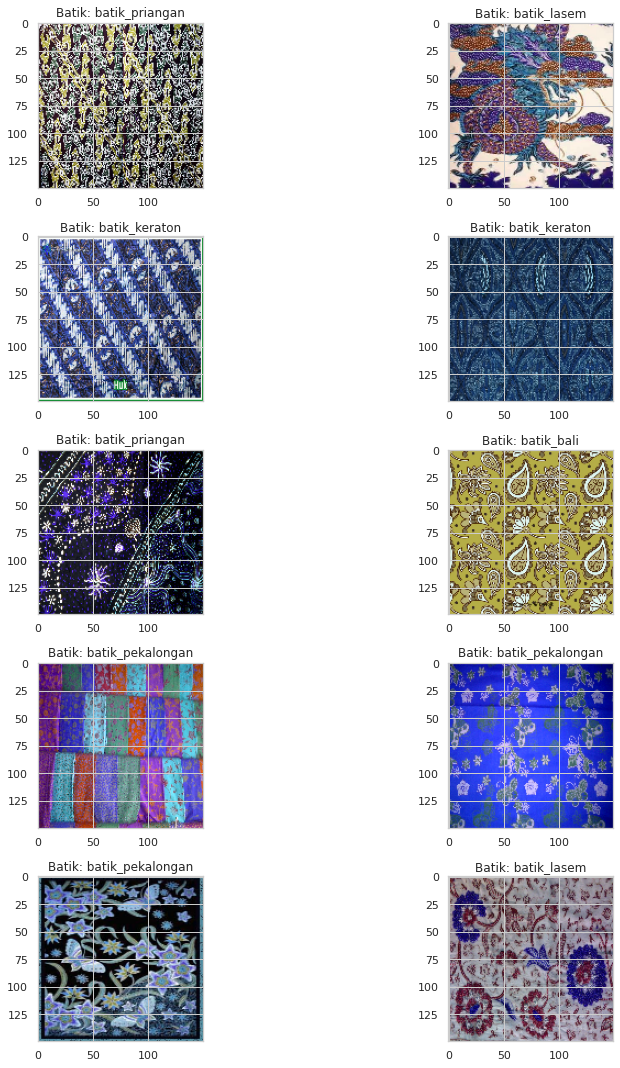

In [ ]:
# menampilkan gambar batik secara acak

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
# modelling using CNN

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128
epochs=300

In [ ]:
datagen = ImageDataGenerator(
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 96)      

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/300
1/1 [==============================] - 7s 7s/step - loss: 1.6093 - accuracy: 0.2373 - val_loss: 3.0216 - val_accuracy: 0.2063
Epoch 2/300
1/1 [==============================] - 6s 6s/step - loss: 2.2424 - accuracy: 0.2712 - val_loss: 1.7798 - val_accuracy: 0.1270
Epoch 3/300
1/1 [==============================] - 11s 11s/step - loss: 1.6644 - accuracy: 0.2109 - val_loss: 1.6402 - val_accuracy: 0.1270
Epoch 4/300
1/1 [==============================] - 6s 6s/step - loss: 1.6191 - accuracy: 0.2034 - val_loss: 1.6138 - val_accuracy: 0.1270
Epoch 5/300
1/1 [==============================] - 5s 5s/step - loss: 1.6052 - accuracy: 0.2373 - val_loss: 1.6143 - val_accuracy: 0.1429
Epoch 6/300
1/1 [==============================] - 5s 5s/step - loss: 1.6056 - accuracy: 0.2373 - val_loss: 1.6245 - val_accuracy: 0.1270
Epoch 7/300
1/1 [==============================] - 5s 5s/step - loss: 1.6019 - accuracy: 0.2373 - val_loss: 1.6480 - val_accuracy: 0.1270
Epoch 8/300
1/1 [===============

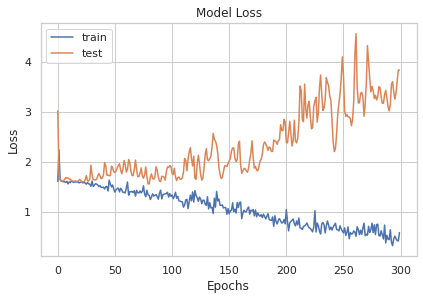

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

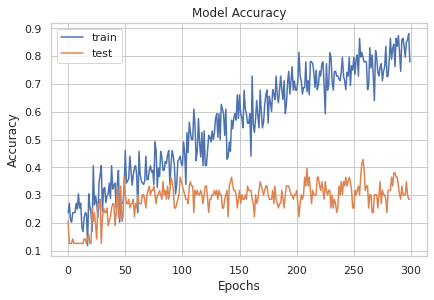

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

2/2 [==============================] - 1s 461ms/step


In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

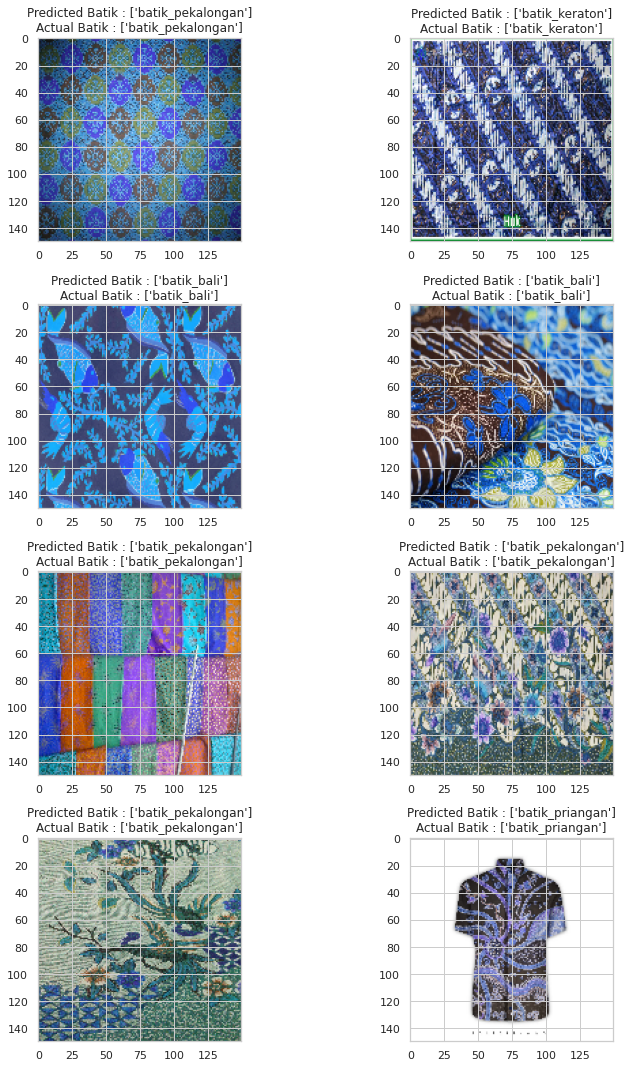

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1